<a href="https://colab.research.google.com/github/KenDaupsey/Multiple-Analysis-of-Variance-MANOVA-and-Multiple-Analysis-of-Covariance-MANCOVA-/blob/main/Multiple_Analysis_of_Variance_(MANOVA)_and_Multiple_Analysis_of_Covariance_(MANCOVA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Multiple Analysis of Variance (MANOVA) and Multiple Analysis of Covariance (MANCOVA) ***

*** Multiple Analysis of Variance (MANOVA) ***

In [1]:
### Import Necessary Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [10]:
### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Multiple-Analysis-of-Variance-MANOVA-and-Multiple-Analysis-of-Covariance-MANCOVA-/main/hsb2%7Edata.csv"
df = pd.read_csv(url)
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [11]:
df.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB


In [13]:
### One-way MANOVA
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Assuming df is your DataFrame
manova_data = df[['read', 'write', 'math', 'prog']]

# Fit MANOVA model
maov = MANOVA.from_formula('read + write + math ~ prog', data=manova_data)
result = maov.mv_test()

# Print the MANOVA results
print(result.summary())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0297 3.0000 195.0000 2120.5059 0.0000
         Pillai's trace  0.9703 3.0000 195.0000 2120.5059 0.0000
 Hotelling-Lawley trace 32.6232 3.0000 195.0000 2120.5059 0.0000
    Roy's greatest root 32.6232 3.0000 195.0000 2120.5059 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
             prog          Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.7340 6.0000 390.0000 10.8705 0.0000
            Pillai's trace 0.2672 6.0000 392.

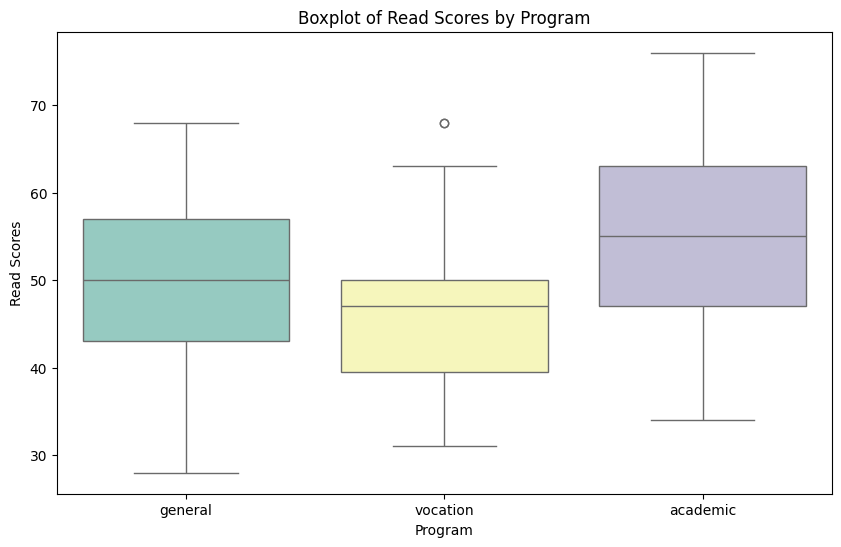

In [18]:
### Visualizing Student Performance Trends by Program Using Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If it's not already installed, you can install seaborn using !pip install seaborn

# Create a boxplot for "read" by "prog"
plt.figure(figsize=(10, 6))
sns.boxplot(x="prog", y="read", data=df, palette="Set3", hue="prog", legend=False)
plt.title("Boxplot of Read Scores by Program")
plt.xlabel("Program")
plt.ylabel("Read Scores")
plt.show()

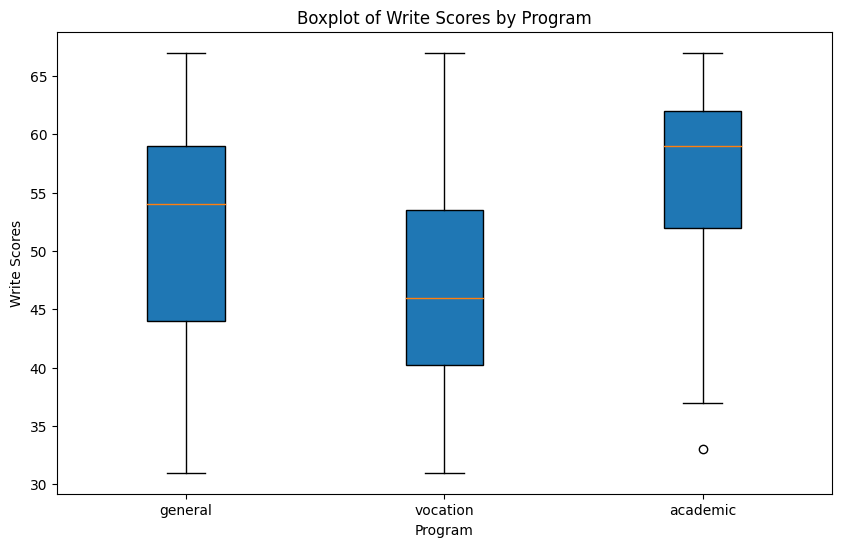

In [15]:
### Analyzing Student Performance Variation in Writing by Program Using Matplotlib
# Group by "prog" and create a list of "read" values for each group
data_by_prog = [df[df['prog'] == program]['write'].dropna().tolist() for program in df['prog'].unique()]

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_by_prog, labels=df['prog'].unique(), patch_artist=True)
plt.title("Boxplot of Write Scores by Program")
plt.xlabel("Program")
plt.ylabel("Write Scores")
plt.show()

In [16]:
### Exploring Math Performance Across Programs Using Plotly
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame

# Create a boxplot with Plotly Express
fig = px.box(df, x="prog", y="math", color="prog", points="all", title="Boxplot of Math Scores by Program")
fig.update_layout(xaxis_title="Program", yaxis_title="Math Scores")
fig.show()

*** Multivariate Analysis of Co-Variance (MANCOVA) ***

In [17]:
### MANCOVA Multivariate Analysis of Co-Variance
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Assuming df is your DataFrame
mancova_data = df[['read', 'write', 'math', 'prog', 'ses']]

# Fit MANCOVA model
manova = MANOVA.from_formula('read + write + math ~ prog + ses', data=mancova_data)
result = manova.mv_test()

# Print the MANCOVA results
print(result.summary())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0519 3.0000 193.0000 1175.2048 0.0000
         Pillai's trace  0.9481 3.0000 193.0000 1175.2048 0.0000
 Hotelling-Lawley trace 18.2674 3.0000 193.0000 1175.2048 0.0000
    Roy's greatest root 18.2674 3.0000 193.0000 1175.2048 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
             prog          Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.7677 6.0000 386.0000  9.0918 0.0000
            Pillai's trace 0.2331 6.0000 388.